In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport

sns.set()

### Reading the Data

In [2]:
data_original=pd.read_csv("donors.csv")

C:\Users\fonse\anaconda3\envs\DM-DSAA\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option("display.max_columns",485)
pd.set_option("display.max_rows",485)

### Make a copy of the original dataset


In [4]:
data = data_original.copy()

In [5]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [6]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [7]:
# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [8]:
# duplicated observations
data.duplicated().sum()

0

In [9]:
# descriptive statistics
data.describe(include="all")  # try with all and without all

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

## Normalize Values

In the columns that have X marked
0 - doesn't have X
1 - have X marked

In [10]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In the columns that have Y marked
0 - N
1 - Y

In [11]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE    94013
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

## Dropping Columns with High percentege of missing values

In [13]:
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

76 columns were removed


In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,2017-02-01,74,6,14,240.0,31,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,

In [15]:
# check dataset data types again
data.dtypes.count()

400

In [16]:
data["TCODE"]=data["TCODE"].astype(object)
data[X_values]=data[X_values].astype(object)
data[Y_Values]=data[Y_Values].astype(object)

In [17]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [18]:
non_metric_features

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'GENDER',
 'DATASRCE',
 'MAJOR',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_21',
 'ADATE_22',
 'ADATE_24',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_21',
 'RFA_22',
 'RFA_24',
 'MAXADATE',
 'MINRDATE',
 'MAXRDATE',
 'LASTDATE',
 'FISTDATE',
 'NEXTDATE',
 'RFA_2R',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_

## Delete columns with same values


In [21]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        if len(set(data[lista[i]])) == 1:
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [22]:
del_columns_with_one_elem(non_metric_features)

In [23]:
data[non_metric_features]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,MAJOR,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,NaN,F,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,NaN,NaN,2015-03-01,NaN,NaN,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,NaN,0,0,0,0,0,XXXX,R2,U,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,NaN,2015-01-01,2014-11-01,NaN,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,1948-01-01,0,0,0,0,0,XXXX,R2,U,F,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,NaN,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,E,X,X,X,C
4,2006-01-01,NaN,0,FL,33176,1940-01-01,0,1,1,0,0,XXXX,S2,H,F,3,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,1,AK,99504,NaN,0,0,0,0,0,XXXX,C2,NaN,M,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,2016-06-01,2016-04-01,NaN,2016-03-01,2016-01-01,2015-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G,F1G,F1G,NaN,F1G,P1G,P1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,NaN,G,X,X,X,C
95408,2016-01-01,DCD,1,TX,77379,1970-01-01,0,0,0,0,0,XXXX,C1,H,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-06-01,NaN,NaN,NaN,NaN,2016-01-01,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F,NaN,NaN,NaN,NaN,P1F,P1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Fill missing values (Data imputation)


In [24]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [25]:
modes = data_central[non_metric_features].mode().loc[0]
modes

ODATEDW     2015-01-01
OSOURCE            MBC
TCODE                0
STATE               CA
ZIP              85351
DOB         1968-01-01
NOEXCH               0
RECINHSE             0
RECP3                0
RECPGVG              0
RECSWEEP             0
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
MAJOR                0
COLLECT1             0
VETERANS             0
BIBLE                0
CATLG                0
HOMEE                0
PETS                 0
CDPLAY               0
STEREO               0
PCOWNERS             0
PHOTO                0
CRAFTS               0
FISHER               0
GARDENIN             0
BOATS                0
WALKER               0
KIDSTUFF             0
CARDS                0
PLATES               0
PEPSTRFL             0
ADATE_2     2017-06-01
ADATE_3     2016-06-01
ADATE_4     2016-04-01
ADATE_5     2016-04-01
ADATE_6     2016-03-01
ADATE_7     2016-02-01
ADATE_8     2016-01-01
ADATE_9    

In [26]:
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()  # checking how many NaNs we still have

0

In [27]:
#lets keep the central imputation
data = data_central.copy()

## Feature Selection with Filtering Method-Correlated Feature Remove

In [34]:
data_corr = data.corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(data_corr)

## Feature Grouping

In [35]:
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.75] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

163

In [36]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [37]:
for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)
correlated_group_list

[   Features1 Features2  corr_value
 0     HHAGE1    HHAGE3    0.993997
 1     HHAGE1     HHAS1    0.921519
 2     HHAGE1     AGEC6    0.905412
 3     HHAGE1     ETHC3    0.888914
 4     HHAGE1    AGE904    0.852352
 5     HHAGE1    AGE903    0.848423
 6     HHAGE1    HHAGE2    0.834608
 7     HHAGE1     AGEC7    0.823909
 8     HHAGE1    AGE905    0.821628
 9     HHAGE1    AGE902    0.819944
 10    HHAGE1    AGE906    0.815876
 11    HHAGE1    AGE901    0.791534
 12    HHAGE1     MARR3    0.775417,
   Features1 Features2  corr_value
 0       HV2       HV1    0.993412
 1       HV2      HVP1    0.932601
 2       HV2      HVP2    0.911005
 3       HV2      HVP6    0.902442
 4       HV2      HVP3    0.836047,
   Features1 Features2  corr_value
 0     ETHC5      ETH2    0.989670
 1     ETHC5     ETHC4    0.930239
 2     ETHC5     ETHC6    0.774043,
   Features1 Features2  corr_value
 0    POP902    POP901    0.988491
 1    POP902    POP903    0.977983,
   Features1 Features2  corr_value
 0

In [38]:
correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)
correlated_group

[array(['HHAGE1', 'HHAGE3', 'HHAS1', 'AGEC6', 'ETHC3', 'AGE904', 'AGE903',
        'HHAGE2', 'AGEC7', 'AGE905', 'AGE902', 'AGE906', 'AGE901', 'MARR3'],
       dtype=object),
 array(['HV2', 'HV1', 'HVP1', 'HVP2', 'HVP6', 'HVP3'], dtype=object),
 array(['ETHC5', 'ETH2', 'ETHC4', 'ETHC6'], dtype=object),
 array(['POP902', 'POP901', 'POP903'], dtype=object),
 array(['HHD7', 'HHD9'], dtype=object),
 array(['LFC5', 'LFC3', 'LFC1', 'LFC4', 'LFC2'], dtype=object),
 array(['AFC1', 'AFC2', 'AFC3'], dtype=object),
 array(['IC3', 'IC1', 'IC4', 'IC2', 'IC5', 'IC11', 'IC12', 'IC20', 'HV3'],
       dtype=object),
 array(['DW4', 'DW5', 'DW6', 'HUPA6', 'HUPA2', 'HU2', 'HU1', 'DW1', 'DW2'],
       dtype=object),
 array(['RHP2', 'RHP1', 'HUR2', 'HHD3', 'VOC2', 'DW1', 'HHD2', 'HU1'],
       dtype=object),
 array(['IC14', 'IC23', 'IC5'], dtype=object),
 array(['HHP2', 'HHP1', 'RHP3', 'HHN3', 'HHN4', 'HHD1', 'HHD2', 'HHN5',
        'HHD4', 'AGE907', 'HHD5'], dtype=object),
 array(['ETH5', 'LSC2', 'ETH13'], 

In [39]:
import random
correlated_drop = list(correlated_group)
for i in range(len(correlated_drop)):
    correlated_drop[i] = list(correlated_drop[i])
    radomIndex = random.randrange(len(correlated_drop[i])-1)
    obj = correlated_drop[i][radomIndex]
    correlated_drop[i].remove(obj)
correlated_drop

[['HHAGE1',
  'HHAS1',
  'AGEC6',
  'ETHC3',
  'AGE904',
  'AGE903',
  'HHAGE2',
  'AGEC7',
  'AGE905',
  'AGE902',
  'AGE906',
  'AGE901',
  'MARR3'],
 ['HV2', 'HV1', 'HVP2', 'HVP6', 'HVP3'],
 ['ETHC5', 'ETH2', 'ETHC6'],
 ['POP902', 'POP903'],
 ['HHD9'],
 ['LFC3', 'LFC1', 'LFC4', 'LFC2'],
 ['AFC2', 'AFC3'],
 ['IC3', 'IC4', 'IC2', 'IC5', 'IC11', 'IC12', 'IC20', 'HV3'],
 ['DW4', 'DW5', 'DW6', 'HUPA6', 'HUPA2', 'HU2', 'DW1', 'DW2'],
 ['RHP2', 'RHP1', 'HUR2', 'VOC2', 'DW1', 'HHD2', 'HU1'],
 ['IC14', 'IC5'],
 ['HHP2',
  'HHP1',
  'RHP3',
  'HHN3',
  'HHN4',
  'HHD1',
  'HHD2',
  'HHD4',
  'AGE907',
  'HHD5'],
 ['ETH5', 'ETH13'],
 ['EIC1'],
 ['AFC4'],
 ['IC19'],
 ['IC21', 'IC4'],
 ['NUMPROM', 'NGIFTALL'],
 ['HV4', 'HV3', 'RP2', 'RP3'],
 ['HC17'],
 ['HC7', 'HC6', 'HC2'],
 ['IC13'],
 ['MARR1', 'HHD5', 'HHD2', 'HU1'],
 ['CARDGIFT', 'CARDPROM'],
 ['HVP4', 'HVP3', 'RP2', 'RP1'],
 ['TPE4'],
 ['HHN5'],
 ['HHD11', 'HHD6', 'HHD2'],
 ['IC15', 'HHAS4'],
 ['RP3'],
 ['HC5'],
 ['IC18'],
 ['IC7'],
 ['LSC3

In [40]:
flat_list = []
for sublist in correlated_drop:
    for item in sublist:
        flat_list.append(item)
correlated_drop=flat_list

In [41]:
data.drop(correlated_drop,inplace=True, axis=1)

In [42]:
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

In [43]:
data.shape

(95412, 284)

## Outlier Removal

In [44]:
data_out = data.copy()
data_out

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHAGE3,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU3,HU4,HU5,HHD3,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC4,HVP1,HVP5,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC16,IC17,IC22,IC23,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC1,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,H,4.0,F,6.0,0,3,0,39,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,992,0,35,47,0,0,0,0,0,0,0,0,0,0,0,0,31,42,27,11,14,18,17,13,25,18,23,18,33,4,7,19,7,7,0,96,4,7,70,6,2,9,3,17,50,0,2,47,1,4,2,0,14,0,73,0.0,177.0,682.0,307,13,23,15,25,24,0,2,4,51,46,3,88,8,0,0,0,0,0,4,1,13,16,2,45,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,5,20,3,4,0,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,4,96,19,13,5,14,46,0,0,90,0,10,0,0,0,65,40,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,6,14,240.0,2012-08-01,12.0,2014-02-01,2015-12-01,2009-11-01,2010-03-01,4.0,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,6.0,M,9.0,16,3,0,15,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3611,99,0,50,0,31,4,2,6,4,14,0,0,0,1,4,33,46,21,13,14,33,23,10,22,15,5,4,21,9,4,24,0,0,0,97,3,9,88,4,1,5,2,18,44,0,97,99,0,5,0,0,4,0,94,4480.0,13.0,803.0,1088,2,5,15,5,2,10,32,2,66,56,9,80,14,0,0,0,0,0,6,0,2,32,12,71,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,14,24,4,10,0,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,16,99,53,5,2,26,0,0,0,96,0,4,0,0,0,0,99,20,4,6,5,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,6,13,47.0,2013-10-01,25.0,2015-12-01,2015-12-01,2013-10-01,2015-04-01,18.0,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,1968-01-01,0,0,0,0,0,XXXX,R2,U,3.0,M,1.0,2,3,0,20,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7001,0,2,49,0,0,0,0,0,0,0,0,0,0,0,0,35,40,25,13,20,19,16,13,22,19,23,21,35,2,9,19,3,3,0,93,7,18,65,7,2,11,3,17,60,0,0,50,4,5,4,24,11,6,44,0.0,281.0,518.0,251,32,15,12,19,24,0,1,8,31,3

In [45]:
#Isto não está a funcionar
q25 = data_out.quantile(.25)
q75 = data_out.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
#data_out = data[filters]
#print('Percentage of data kept after removing outliers:', np.round(data_out.shape[0] / data_original.shape[0], 4))

## Data Standardization

In [46]:
standard = data.copy()

In [47]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(standard[metric_features])
scaled_feat

array([[-0.05684721, -0.01915632, -0.27488483, ..., -0.00476043,
        -1.00123751,  1.94822609],
       [-0.05579882, -0.01915632, -0.27488483, ...,  0.95428208,
        -1.00123751,  0.08384741],
       [-0.05579882, -0.01915632, -0.27488483, ..., -1.4597303 ,
         0.99876402,  1.94822609],
       ...,
       [-0.05579882, -0.01915632, -0.27488483, ...,  1.6978204 ,
         0.99876402,  1.01603675],
       [-0.05684721, -0.01915632,  3.63788723, ..., -1.64757746,
         0.99876402,  1.94822609],
       [-0.05475042, -0.01915632,  3.63788723, ...,  1.61593459,
         0.99876402, -0.84834193]])

In [48]:
standard[metric_features] = scaled_feat
standard.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHAGE3,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU3,HU4,HU5,HHD3,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC4,HVP1,HVP5,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC16,IC17,IC22,IC23,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC1,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,-0.056847,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.394185,-1.235273,0.684696,-0.217719,-0.223937,-0.411007,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,0.053343,-0.409676,-0.076580,0.027298,-0.816497,-0.444526,0.882053,1.372488,-0.156494,0.465714,-0.519690,-0.321105,0.692453,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.431790,-0.435249,-0.909136,-0.510811,-0.331514,-0.637539,-0.593674,0.364485,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,-0.202946,-0.585640,0.626834,-0.098231,0.989500,0.990253,-0.483565,-0.050958,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.651662,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.188230,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.167262,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,-0.897802,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2

In [49]:
# Checking mean and variance of standardized variables
standard[metric_features].describe().round(2)

,TCODE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHAGE3,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU3,HU4,HU5,HHD3,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC4,HVP1,HVP5,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC16,IC17,IC22,IC23,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC1,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,CARDPM12,NUMPRM12,RAMNTALL,MAXRAMNT,TIMELAG,CONTROLN,HPHONE_D,RFA_2F
count,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.00,95412.0,95412.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.

In [50]:
data = standard.copy()

## One-hot encoding

In [51]:
df_ohc =  data.copy()

In [52]:
df_ohc[non_metric_features]

,ODATEDW,OSOURCE,STATE,ZIP,DOB,MDMAUD,DOMAIN,HOMEOWNR,GENDER,DATASRCE,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,IL,61081,1957-12-01,XXXX,T2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,2017-02-01,2012-08-01,2014-02-01,2015-12-01,2009-11-01,2010-03-01,L,E,X,X,X,C
1,2014-01-01,BOA,CA,91326,1972-02-01,XXXX,S1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,A1F,A1F,L1E,A1E,A1E,N1E,N1E,N1E,F1E,2017-02-01,2013-10-01,2015-12-01,2015-12-01,2013-10-01,2015-04-01,L,G,X,X,X,A
2,2010-01-01,AMH,NC,27017,1968-01-01,XXXX,R2,U,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,A1F,S4F,S4F,S4F,S4F,S4F,A1E,S4D,S4D,A1E,S4D,S3D,2017-02-01,2011-11-01,2012-07-01,2015-12-01,2010-01-01,2011-01-01,L,E,X,X,X,C
3,2007-01-01,BRY,CA,95953,1948-01-01,XXXX,R2,U,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,A1F,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1E,2017-02-01,2007-11-01,2014-11-01,2015-12-01,2007-02-01,2007-11-01,L,E,X,X,X,C
4,2006-01-01,MBC,FL,33176,1940-01-01,XXXX,S2,H,F,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,2015-09-01,2015-08-01,2015-02-01,2015-06-01,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-10-01,2015-06-01,2014-06-01,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,L3D,A2D,A2D,A3D,A3D,I4E,A3D,2017-02-01,2013-10-01,2016-01-01,2016-01-01,1999-03-01,2000-05-01,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016-01-01,ASE,AK,99504,1968-01-01,XXXX,C2,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2015-12-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1G,F1G,F1G,A1F,F1G,P1G,P1G,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-02-01,2016-02-01,2016-02-01,2016-02-01,2015-04-01,L,G,X,X,X,C
95408,2016-01-01,DCD,TX,77379,1970-01-01,XXXX,C1,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-01-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L1F,A1F,A1F,A1F,A1F,P1F,P1F,A1F,A1F,A1F,A1F,A1F,A1F,A1E,A1E,A1E,A1E,A1E,A1E,A1E,2017-02-01,2016-03-01,2016-03-01,2016-03-01,2016-03-01,2015-04-01,L,F,X,X,X,A
95409,2015-01-01,MBC,MI,48910,1958-01-01,XXXX,C3,H,M,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-09-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-09-01,2014-0

In [53]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
#ohc = OneHotEncoder(sparse=False, drop="first")
#ohc_feat = ohc.fit_transform(df_ohc[non_metric_features].astype(str))
#ohc_feat_names = ohc.get_feature_names()
#ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
#ohc_df

## Dimensionality Reduction

In [76]:
df_pca = data.copy()

In [77]:
# Use PCA to reduce dimensionality of data
#pca = PCA()
#pca_feat = pca.fit_transform(df_pca[metric_features])
#pca_feat

In [78]:
#cov_matrix = df_pca[metric_features].cov()
#cov_matrix

In [79]:
# Composing back the covariance matrix
#pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
#             index=cov_matrix.index, 
#             columns=cov_matrix.columns)

In [80]:
# Obtaining the projected observations on the principal components axes (linear combinations)
#pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
#             index=df_pca.index,
#             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [81]:
#pd.DataFrame(
#    {"Eigenvalue": pca.explained_variance_,
#     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#     "Proportion": pca.explained_variance_ratio_,
#     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#    index=range(1, pca.n_components_ + 1)
#)

In [82]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=9)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.729519,-3.579682,-0.625682,1.128606,-0.913579,2.337974,-0.972848,-1.491186,0.398581
1,-11.470665,2.416440,-1.667801,8.641633,-3.832672,-3.993665,4.078702,-1.293800,-1.315513
2,5.211621,-4.164987,-1.862506,-0.017554,-0.101487,0.225050,0.946660,-2.373325,-2.353657
3,3.785571,2.154530,-1.300916,3.802959,-1.736359,-4.441923,3.907275,-0.994172,-0.553785
4,4.837810,0.903122,0.392344,0.901994,-4.317853,2.383774,-0.069758,7.014989,2.445059
...,...,...,...,...,...,...,...,...,...
95407,-3.174531,2.957906,-2.719821,-1.968058,2.600561,-0.800317,1.434524,-0.072412,3.974264
95408,-7.346996,-1.609435,-2.258233,2.096776,2.509844,-0.896244,2.181031,-1.571404,-0.016221
95409,2.028036,2.969661,-2.676759,-0.642901,0.787686,4.909986,0.424540,-0.252069,2.894114
95410,-5.332667,0.498001,-2.169365,2.556347,-1.162169,0.573495,0.287015,-1.149931,0.891747


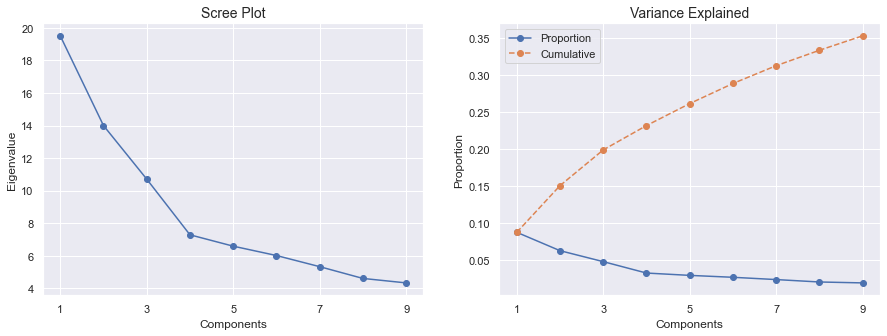

In [83]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [84]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP90C1,POP90C2,POP90C4,ETH3,ETH4,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,CHILC4,CHILC5,HHAGE3,HHN1,HHN2,HHN6,MARR2,MARR4,DW7,DW8,DW9,HU3,HU4,HU5,HHD3,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC4,HVP1,HVP5,HUR1,RHP4,HUPA1,HUPA3,HUPA4,HUPA7,RP4,MSA,ADI,DMA,IC1,IC6,IC9,IC10,IC16,IC17,IC22,IC23,HHAS2,HHAS3,MC1,MC3,TPE1,TPE2,TPE3,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE11,TPE12,TPE13,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,SEC1,SEC2,SEC3,SEC5,AFC1,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC4,VOC1,VOC3,HC1,HC3,HC4,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC18,HC19,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,MAXADATE,CARDPM12,NUMPRM12,RAMNTALL,MINRDATE,MAXRAMNT,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2009-01-01,GRI,-0.056847,IL,61081,1957-12-01,-0.019156,-0.274885,-0.146957,-0.034587,-0.1313,XXXX,T2,H,0.054029,F,0.171607,-0.356881,3,-0.206977,0.745798,-0.055596,0.011930,-0.240136,-0.350256,-0.320166,-0.299729,-0.09687,-0.420329,-0.383872,-0.393519,-0.351292,-0.229805,-0.306142,-0.28419,-0.404251,-0.147366,-0.351668,-0.127914,-0.105028,-0.076837,1.052458,-0.394185,-1.235273,0.684696,-0.217719,-0.223937,-0.411007,-0.318003,-0.178012,-0.241859,-0.243155,-0.249707,-0.199512,-0.058468,-0.233968,-0.102047,-0.449775,-1.043796,0.570857,1.027129,-0.197237,-1.051630,-0.427141,0.681650,0.275532,1.149868,0.486159,0.053343,-0.409676,-0.076580,0.027298,-0.816497,-0.444526,0.882053,1.372488,-0.156494,0.465714,-0.519690,-0.321105,0.692453,-0.353743,0.334768,-0.648917,-0.442066,0.035937,-0.054125,-0.431790,-0.435249,-0.909136,-0.510811,-0.331514,-0.637539,-0.593674,0.364485,-0.533671,-0.145106,-1.232565,-0.075511,0.155099,-0.202946,-0.585640,0.626834,-0.098231,0.989500,0.990253,-0.483565,-0.050958,-0.338264,0.471262,-0.147841,-0.904544,0.895769,-0.746148,-0.429073,-0.206928,-0.138679,-0.343702,-0.741218,0.202299,-0.203281,-0.278098,-1.164948,-0.618802,-0.864418,-0.651662,-0.128786,0.243106,0.939209,-1.401205,-0.717487,-0.622342,-1.344233,1.738274,0.107748,-1.133843,-0.421214,0.718882,-0.256270,0.028142,0.618443,2.160262,0.306458,0.086618,-0.292224,-0.827599,2.363671,-1.024576,-1.162464,0.849349,-0.634092,-0.184685,0.103889,-1.018332,1.099332,0.211809,-0.756187,-1.258025,-0.388224,0.700961,-0.528229,-0.525493,-0.191628,0.685501,-0.938287,-0.480644,-0.452344,0.873309,-0.374350,1.001517,0.029293,0.428334,-1.034951,0.332656,-0.27016,0.81935,-0.495530,-0.188230,0.737899,-0.780437,0.235691,0.521963,-0.901694,0.437362,0.122217,-0.344714,-0.636455,1.550839,-0.269449,-0.333052,0.045006,-0.322441,-0.362632,-0.462590,-0.193820,-0.277806,-0.743523,1.007809,-0.201563,-0.375798,0.779032,0.014260,0.167262,0.121198,0.336945,-0.093485,1.536476,0.402294,0.093516,0.315814,-0.356914,-0.385986,1.069709,-0.569963,-0.707898,-0.471679,-0.143765,-0.509344,1.866657,-0.897802,-0.598374,-0.382472,1.454234,0.313229,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-0

In [86]:
# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.drop_duplicates()
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TCODE,0.003585,-0.001228,0.002353,-0.000539,-0.003463,-0.000138,-0.003330,-0.000481,-0.003600
NOEXCH,-0.000208,-0.003146,-0.000565,-0.000083,-0.001876,0.002535,-0.000653,-0.000956,-0.006371
RECINHSE,-0.025104,0.021121,0.060090,-0.011596,-0.039265,0.028131,0.006082,-0.032120,-0.016482
RECP3,-0.019863,0.001616,0.020988,-0.008491,-0.003098,-0.000801,-0.006245,-0.016515,-0.027525
RECPGVG,-0.002365,0.010410,0.011815,-0.012538,-0.002148,-0.008263,0.010107,-0.007960,-0.000706
RECSWEEP,0.006236,0.002604,0.012817,-0.017230,-0.006688,-0.008193,0.005531,-0.008879,-0.004552
INCOME,-0.383073,-0.047471,-0.025294,0.149646,0.047475,-0.072514,0.045655,0.042005,-0.029841
WEALTH1,-0.528322,-0.126541,0.015718,0.146242,0.111042,0.006551,0.012559,-0.021999,-0.040632
HIT,-0.060732,-0.006518,0.033133,-0.030571,-0.036729,0.085798,-0.038769,0.120974,0.010128
MALEMILI,-0.019488,0.098978,-0.108883,-0.145382,0.236261,-0.075543,0.089290,0.121351,0.307330
